**Task-04**

* Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

# Description

**About Dataset:** this is the Twitter Sentiment Analysis Dataset.

**Overview:**
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

**Problem Statement:**A Twitter sentiment analysis uses NLP and ML models to classify tweets into negative, positive or neutral emotions.


#IMPORTING LIBRARIES



pandas (import pandas as pd): For handling structured data with DataFrames.

numpy (import numpy as np): For numerical operations on arrays and matrices.

matplotlib (import matplotlib.pyplot as plt): For creating static visualizations.

seaborn (import seaborn as sb): For creating attractive statistical visualizations.

Setting display options (pd.set_option): Adjusts options to display all columns and limit rows to 150 for better data exploration.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import files
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer




#display all columns and rows of the dataframe
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 150)

IMPORTING DATA SET

Upload a file from your local machine to your Colab environment

uploaded = files.upload()

Download a file from your Colab environment to your local machine

files.download('example.txt')

In [3]:
raw= files.upload()


Saving twitter_training.csv to twitter_training.csv


REVIEWING THE DATASET

In [4]:
rdata=pd.read_csv('twitter_training.csv')

SHALLOW COPYING

In [5]:
df=rdata.copy()

In [6]:
ndata=rdata.copy()

#EXPLORATORY DATA ANALYSIS

In [7]:
df.shape   #an attribute of a DataFrame that returns a tuple representing the dimensions of the DataFrame.

(74681, 4)

In [8]:
df.columns=['id','country','label','text']

In [9]:
df.head() #show first few rows to learn the structure of the data

,id,country,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
df.tail()#show last few rows to learn the structure of the data

,id,country,label,text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [11]:
df.columns

Index(['id', 'country', 'label', 'text'], dtype='object')

In [12]:
df.info() # Display concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74681 non-null  int64 
 1   country  74681 non-null  object
 2   label    74681 non-null  object
 3   text     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [13]:
# Display summary for categorical data
df.describe(include='object').T

,count,unique,top,freq
country,74681,32,TomClancysRainbowSix,2400
label,74681,4,Negative,22542
text,73995,69490,,172


In [14]:
# Display summary for numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74681.0,6432.640149,3740.423819,1.0,3195.0,6422.0,9601.0,13200.0


In [15]:
rdata.iloc[105:110,:]

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
105,2418,Borderlands,Irrelevant,Appreciate by the ( sonic ) electronic concept...
106,2418,Borderlands,Irrelevant,Appreciate the (sonic) conversations / actions...
107,2419,Borderlands,Negative,@Borderlands how do I submit a complaint? Your...
108,2419,Borderlands,Negative,"@ Borderlands, how can I file a complaint? You..."
109,2419,Borderlands,Negative,@ Borderlands how to file a complaint? Your CE...


In [16]:
#Unique value of the every column
for col in df.columns:
    print(col, df[col].unique())
    print()

id [2401 2402 2403 ... 9198 9199 9200]

country ['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']

label ['Positive' 'Neutral' 'Negative' 'Irrelevant']

text ['I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,'
 'im coming on borderlands and i will murder you all,' ...
 'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'
 'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers

# ***HANDLING MISSING VALUES***

In [17]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Length: 74681, dtype: bool

In [18]:
df.duplicated().sum()

2700

In [19]:
df=df.drop_duplicates()

DETECTION OF MISSING VALUES

In [20]:
df.isnull().sum()

id           0
country      0
label        0
text       326
dtype: int64

no missing values in the data frame verified by visualization

<Axes: >

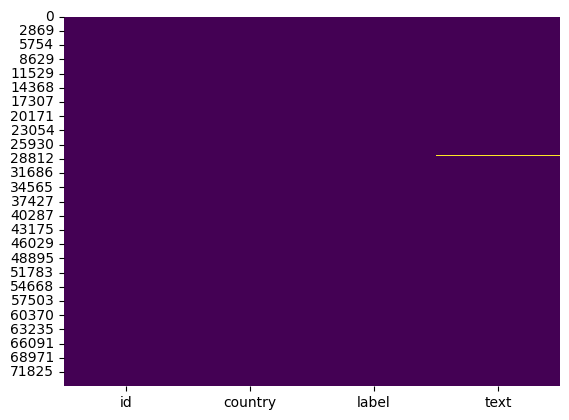

In [21]:
sb.heatmap(df.isnull(),cbar=False, cmap='viridis')

In [22]:
(df.isna().sum()*100/df.shape[0]).sort_values(ascending=True)

id         0.000000
country    0.000000
label      0.000000
text       0.452897
dtype: float64

HANDLING MISSING VALUES

General Recommendations:


Always understand the nature of missing values before deciding on a strategy.


Consider the impact of missing data on your analysis and results.


Document any imputation or handling strategy for transparency.

In [23]:
#for y variable ,
df.dropna(subset=['text'], inplace=True)

In [24]:
df.isnull().sum()

id         0
country    0
label      0
text       0
dtype: int64

#UNIVARIATE ANALYSIS

FOR CATEGORICAL FEATURES

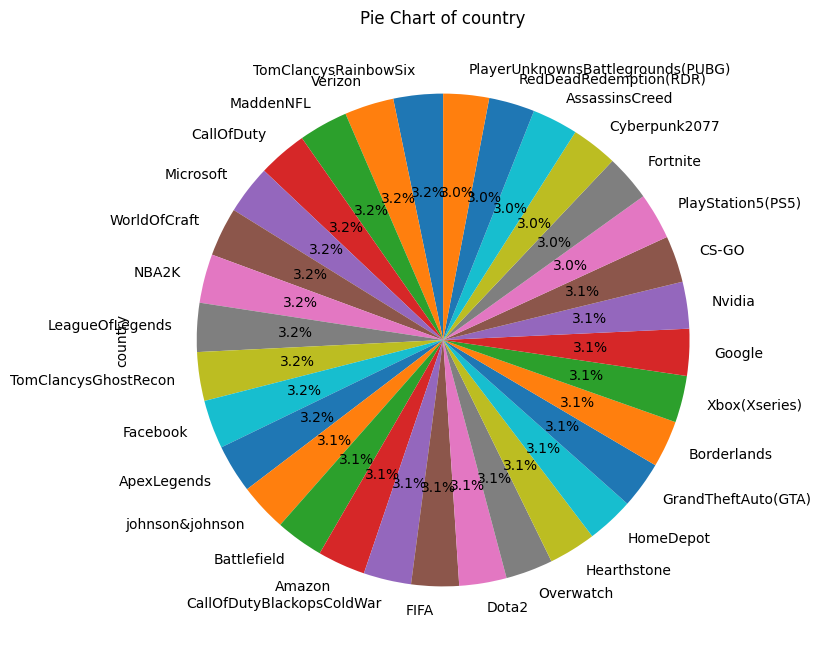

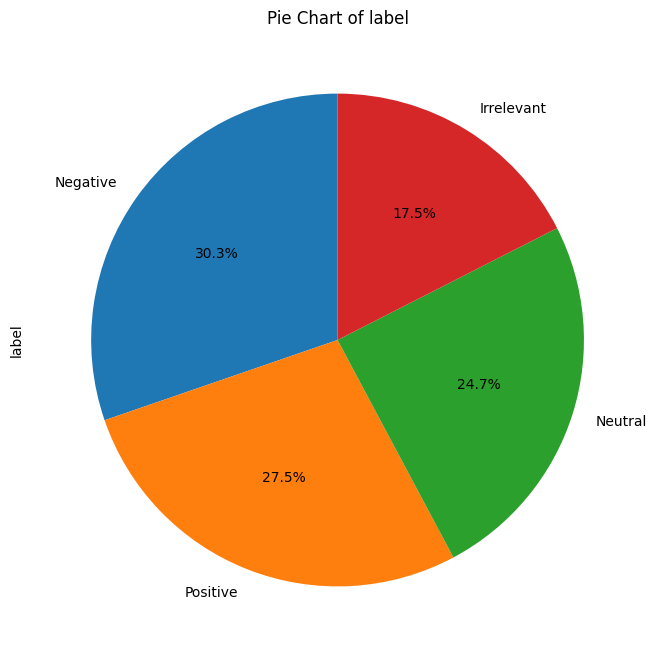

In [25]:
for column in df.select_dtypes(include='object').columns:
    if column == 'text':
        continue

    # Pie chart
    plt.figure(figsize=(8, 8))  # Adjust the figsize according to your preference
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.show()


In [26]:
df.columns

Index(['id', 'country', 'label', 'text'], dtype='object')

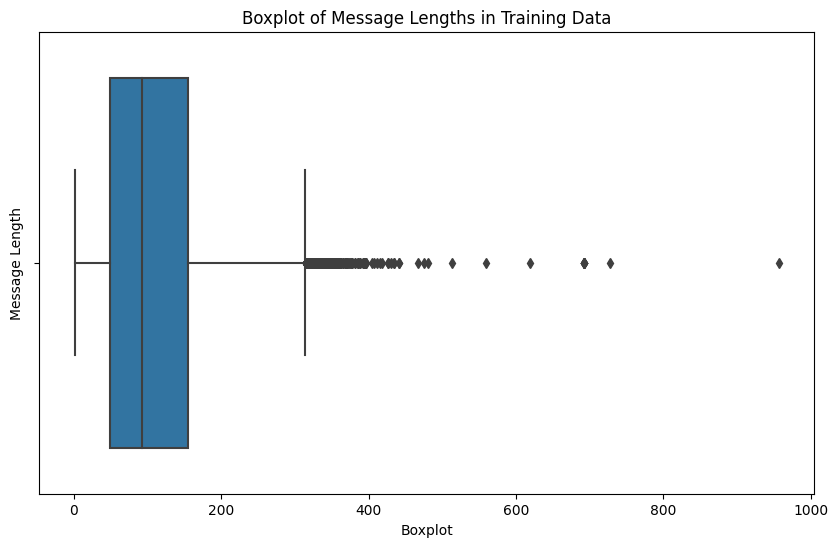

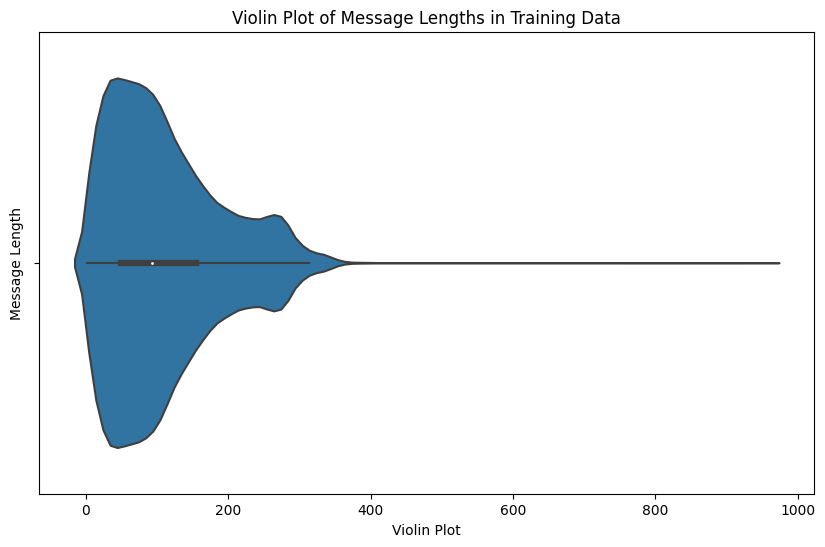

In [27]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'text' is the column containing messages
message_length = df['text'].apply(len)

# Boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x=message_length)
plt.title('Boxplot of Message Lengths in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Boxplot')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sb.violinplot(x=message_length)
plt.title('Violin Plot of Message Lengths in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Violin Plot')
plt.show()


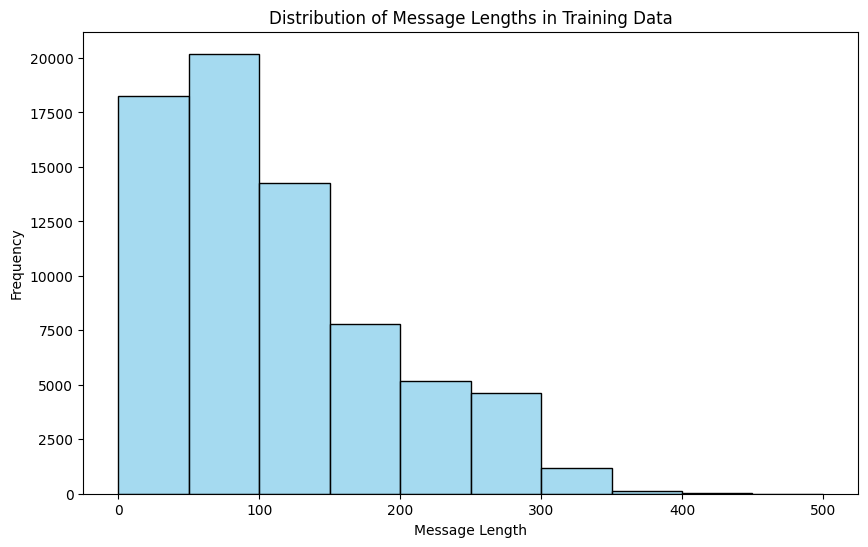

In [28]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'text' is the column containing messages
message_length = df['text'].apply(len)

# Define custom bins for message length ranges
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create a count plot
plt.figure(figsize=(10, 6))
sb.histplot(message_length, bins=bins, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Message Lengths in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()


In [29]:
df.dtypes

id          int64
country    object
label      object
text       object
dtype: object

<Axes: ylabel='text'>

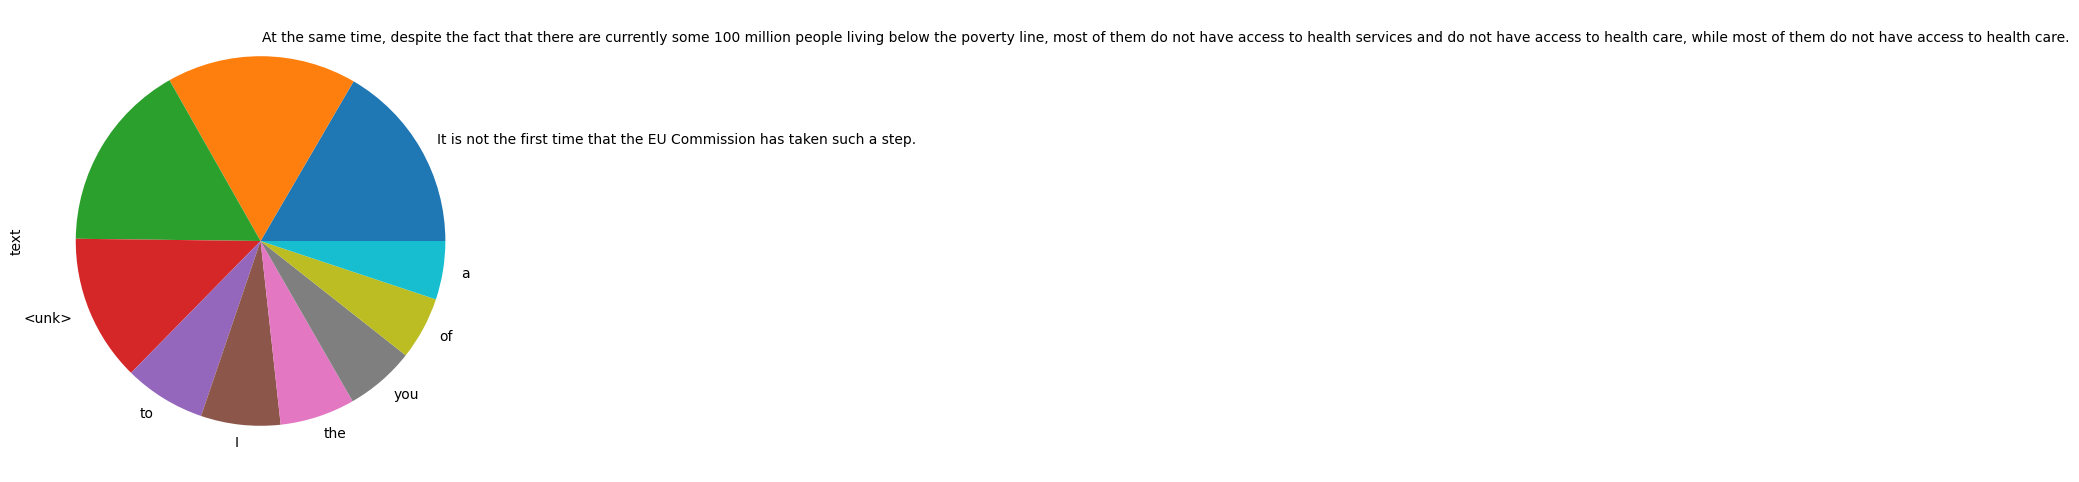

In [30]:
#find values with top 10 occurrences in 'Borderlands'
plt.figure(figsize=(15,6))
top_10 = (df['text'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='pie')

<Axes: ylabel='country'>

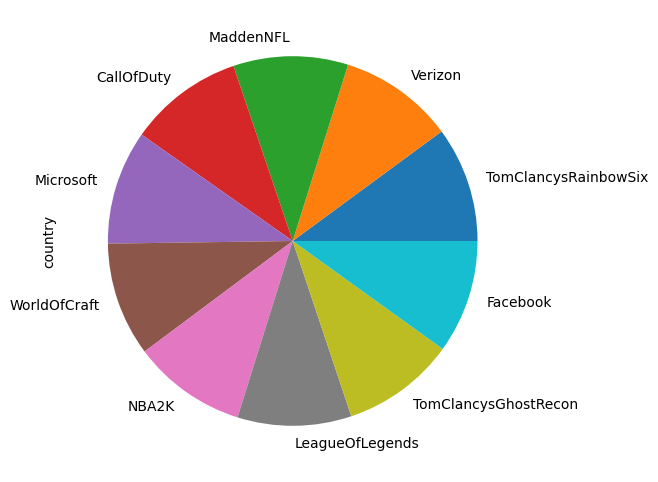

In [31]:
#find values with top 10 occurrences in 'Borderlands'
plt.figure(figsize=(15,6))
top_10 = (df['country'].value_counts()).iloc[:10]

#create bar chart to visualize top 10 values
top_10.plot(kind='pie')

In [32]:
df.dtypes

id          int64
country    object
label      object
text       object
dtype: object

#Preprocessed text

In [33]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [34]:
df['Preprocessed text'] = df['text'].apply(preprocess)

In [35]:
lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])
df['country']=lb.fit_transform(df['country'])

In [36]:
df

,id,country,label,text,Preprocessed text
0,2401,4,3,I am coming to the borders and I will kill you...,come border kill
1,2401,4,3,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,4,3,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,4,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,4,3,im getting into borderlands and i can murder y...,m get borderland murder
...,...,...,...,...,...
74676,9200,21,3,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74677,9200,21,3,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74678,9200,21,3,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74679,9200,21,3,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


In [37]:
tv=TfidfVectorizer()
df_tv=tv.fit_transform(df['Preprocessed text'])

In [38]:
print(df_tv)

  (0, 14186)	0.5019686782389964
  (0, 4300)	0.7503332981844422
  (0, 5882)	0.43014809973153667
  (1, 4303)	0.6308352317883091
  (1, 10718)	0.4731922339217186
  (1, 14186)	0.6149276543551802
  (2, 16730)	0.7359220742014858
  (2, 4303)	0.519630312809822
  (2, 5882)	0.4340541886817236
  (3, 16730)	0.7497229075893237
  (3, 4303)	0.5293750013057333
  (3, 10718)	0.3970864765115596
  (4, 16730)	0.7497229075893237
  (4, 4303)	0.5293750013057333
  (4, 10718)	0.3970864765115596
  (5, 16356)	0.32986143201396134
  (5, 5868)	0.0950308449908003
  (5, 25306)	0.12371465037450177
  (5, 18780)	0.12279967472353039
  (5, 8680)	0.17199301599436456
  (5, 6478)	0.31519414526267836
  (5, 26163)	0.2882003846504435
  (5, 12710)	0.23515040647542382
  (5, 17993)	0.2103819690143733
  (5, 18508)	0.17463994232150065
  :	:
  (71652, 17401)	0.335661757431383
  (71652, 12602)	0.28873546946764583
  (71652, 20209)	0.3195397101596675
  (71652, 27556)	0.21093083092118967
  (71653, 18390)	0.41917259340568874
  (71653, 17512

#DATA PARTITIONING

The dataset will be divided into 80% for training and 20% for testing.


In [39]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df_tv, df['label'],test_size=0.2, random_state=42)

In [40]:
x_test.shape

(14331, 28054)

In [41]:
y_test.shape

(14331,)

#***MODEL BUILDING***

#LOGISTIC REGRESSION

Logistic regression

It is a popular supervised machine learning algorithm used for predicting categorical outcomes based on a set of independent variables.

It's mainly used for classification tasks, where the dependent variable is binary (e.g., 0 or 1, Yes or No), and it provides probabilistic values between 0 and 1 as predictions.

Unlike linear regression, which is used for regression problems, logistic regression employs an "S"-shaped logistic function to model the probability of an observation belonging to a particular class.

This algorithm is valuable because it can provide probability estimates and effectively classify new data using both continuous and discrete datasets.

It's widely used in various fields, including healthcare for diagnosing diseases, marketing for customer segmentation, and more.





In [42]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
  # Assuming your model is already trained
y_pred = classifier.predict(x_test)

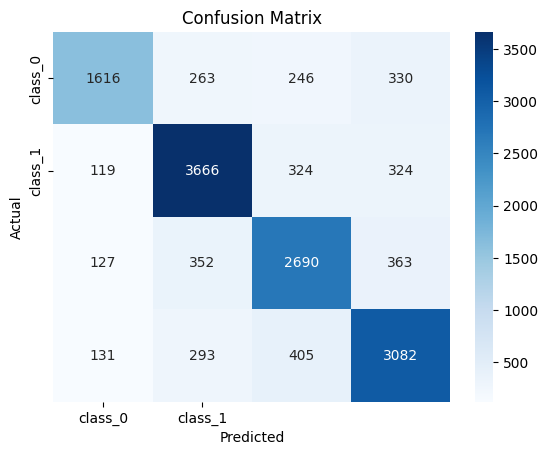

In [45]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      2455
           1       0.80      0.83      0.81      4433
           2       0.73      0.76      0.75      3532
           3       0.75      0.79      0.77      3911

    accuracy                           0.77     14331
   macro avg       0.77      0.76      0.76     14331
weighted avg       0.77      0.77      0.77     14331



In [47]:
# Print accuracy
lr_acs = accuracy_score(y_test, y_pred)*100
print("\nAccuracy:", lr_acs)



Accuracy: 77.13348684669597


# ***KNN***

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.


K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.


K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.


It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.


KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1, so this data point will lie in which of these categories. To solve this type of problem, we need a K-NN algorithm. With the help of K-NN, we can easily identify the category or class of a particular dataset.

STEPS:

        Select the number K of the neighbors

        Calculate the Euclidean distance of K number of neighbors

        Take the K nearest neighbors as per the calculated Euclidean distance

        Among these k neighbors, count the number of the data points in each category

        Assign the new data points to that category for which the number of the neighbor is maximum

        Our model is ready




In [48]:
knn = KNeighborsClassifier(n_neighbors= 7, p=2)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [49]:
  # Assuming your model is already trained
y_pred_knn = knn.predict(x_test)

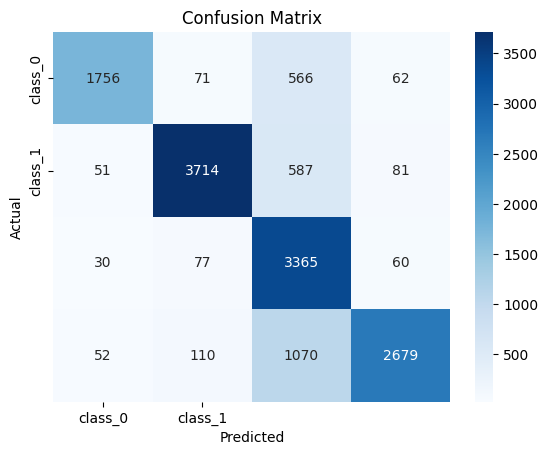

In [50]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      2455
           1       0.94      0.84      0.88      4433
           2       0.60      0.95      0.74      3532
           3       0.93      0.68      0.79      3911

    accuracy                           0.80     14331
   macro avg       0.85      0.80      0.80     14331
weighted avg       0.85      0.80      0.81     14331



In [52]:
# Print accuracy
knn_acs = accuracy_score(y_test, y_pred_knn)*100
print("\nAccuracy:", knn_acs)



Accuracy: 80.34331170190497


# ***NAIVE BAYES CLASSIFICATION***

Naïve Bayes classification

It is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes theorem in the classifier's decision rule. Naïve Bayes classifier applies the Bayes theorem in practice. This classifier brings the power of Bayes theorem to machine learning.

2. Naive Bayes algorithm intuition


Naïve Bayes Classifier uses the Bayes theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.

3. Types of Naive Bayes algorithm

Gaussian Naïve Bayes

Multinomial Naïve Bayes

Bernoulli Naïve Bayes

Gaussian Naïve Bayes algorithm

When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class.


Multinomial Naïve Bayes algorithm

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn)  Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

Bernoulli Naïve Bayes algorithm

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

Applications


Spam filtering

Text classification


Sentiment analysis

Recommender systems

It uses Bayes theorem of probability for prediction of unknown class

In [55]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print('classification_report:\n',classification_report(y_test,y_pred_nb))
print('accuracy:',accuracy_score(y_test,y_pred_nb)*100)
print('Error value',np.mean(y_pred_nb!=y_test)*100)
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_nb))

classification_report:
               precision    recall  f1-score   support

           0       0.95      0.44      0.61      2455
           1       0.66      0.89      0.76      4433
           2       0.82      0.64      0.72      3532
           3       0.69      0.79      0.74      3911

    accuracy                           0.72     14331
   macro avg       0.78      0.69      0.71     14331
weighted avg       0.76      0.72      0.72     14331

accuracy: 72.40946200544275
Error value 27.590537994557252
confusion_matrix
 [[1092  669  142  552]
 [  17 3929  168  319]
 [  23  754 2265  490]
 [  17  615  188 3091]]


In [56]:
  # Assuming your model is already trained
y_pred_nb = nb.predict(x_test)

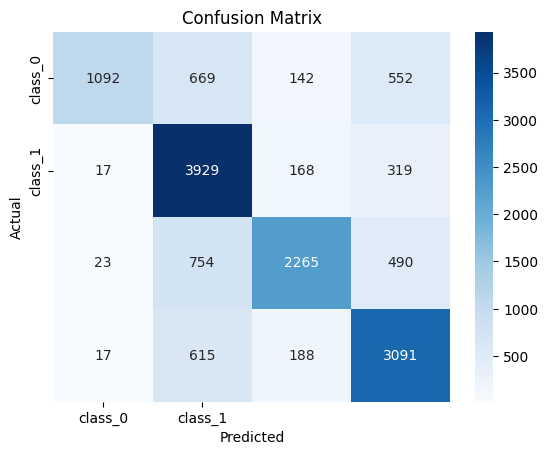

In [57]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.44      0.61      2455
           1       0.66      0.89      0.76      4433
           2       0.82      0.64      0.72      3532
           3       0.69      0.79      0.74      3911

    accuracy                           0.72     14331
   macro avg       0.78      0.69      0.71     14331
weighted avg       0.76      0.72      0.72     14331



In [61]:
# Print accuracy
nb_acs = accuracy_score(y_test, y_pred_nb)*100
print("\nAccuracy:", nb_acs)



Accuracy: 72.40946200544275


In [62]:
nb.score(x_test,y_test)

0.7240946200544275

In [63]:
nb.score(x_train,y_train)

0.775347149535971

DECISION TREE CLASSIFIER

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
DecisionTreeClassifier()


DecisionTreeClassifier()

In [65]:
y_pred_dtc = dtc.predict(x_test)

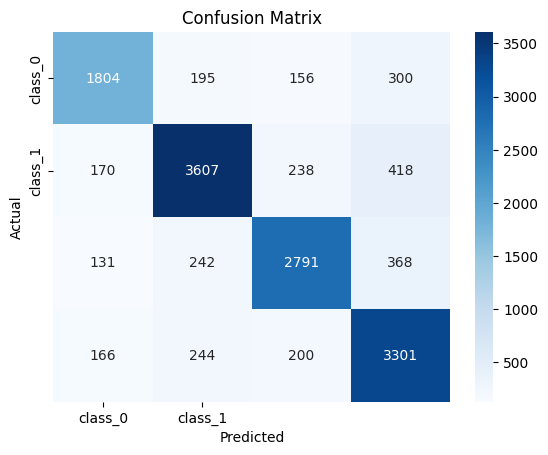

In [66]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2455
           1       0.84      0.81      0.83      4433
           2       0.82      0.79      0.81      3532
           3       0.75      0.84      0.80      3911

    accuracy                           0.80     14331
   macro avg       0.80      0.80      0.80     14331
weighted avg       0.80      0.80      0.80     14331



In [68]:
# Print accuracy
dtc_acs = accuracy_score(y_test, y_pred_dtc)*100
print("\nAccuracy:", dtc_acs)


Accuracy: 80.26655502058475


Logistic Regression Accuracy: 77.13
KNN Accuracy: 80.34
Naive Bayes Accuracy: 72.41
Desicion tree classifier Accuracy: 80.27


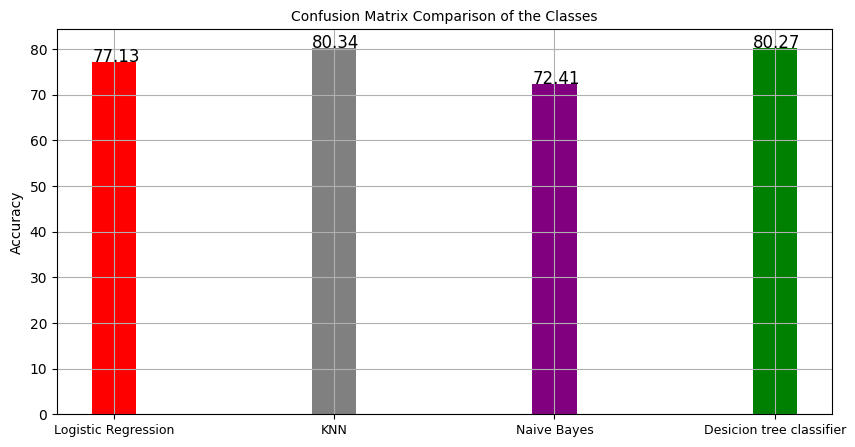

In [69]:
class_name = ("Logistic Regression", "KNN", "Naive Bayes",'Desicion tree classifier')
class_score = (lr_acs,knn_acs,nb_acs,dtc_acs)
for name, score in zip(class_name, class_score):
    print(f"{name} Accuracy: {score:.2f}")

y_pos = np.arange(len(class_score))
colors = ("red", "gray", "purple", "green", "orange","blue")

plt.figure(figsize=(10, 5))

# Adjust the width parameter to decrease the bar size
bar_width = 0.2  # You can adjust this value as needed
bar_positions = y_pos - bar_width / 2
bars = plt.bar(y_pos, class_score, color=colors, width=bar_width)

# Adding annotations to the bars
for bar, score in zip(bars, class_score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f"{score:.2f}", fontsize=12)

plt.xticks(y_pos, class_name, fontsize=9)
plt.ylabel('Accuracy')
plt.grid()
plt.title("Confusion Matrix Comparison of the Classes", fontsize=10)
plt.show()

#VADER Sentiment Analysis

In [75]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [76]:
# Function to get sentiment scores for a given text
def get_sentiment_scores(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

In [77]:
df3=df.copy()

In [78]:
# Apply the sentiment analysis function to the 'text' column and create new columns for scores
df3['sentiment_scores'] = df3['text'].apply(get_sentiment_scores)

In [79]:
df3['sentiment_scores']

0        {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...
1        {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
2        {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
3        {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...
4        {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...
                               ...                        
74676    {'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'co...
74677    {'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...
74678    {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...
74679    {'neg': 0.074, 'neu': 0.842, 'pos': 0.084, 'co...
74680    {'neg': 0.09, 'neu': 0.728, 'pos': 0.182, 'com...
Name: sentiment_scores, Length: 71655, dtype: object

In [80]:
# Extract individual sentiment scores into separate columns
df3['compound'] = df3['sentiment_scores'].apply(lambda x: x['compound'])
df3['positive'] = df3['sentiment_scores'].apply(lambda x: x['pos'])
df3['neutral'] = df3['sentiment_scores'].apply(lambda x: x['neu'])
df3['negative'] = df3['sentiment_scores'].apply(lambda x: x['neg'])

In [81]:
df3['sentiment'] = df3['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

In [82]:
df3

,id,country,label,text,Preprocessed text,sentiment_scores,compound,positive,neutral,negative,sentiment
0,2401,4,3,I am coming to the borders and I will kill you...,come border kill,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,0.000,0.657,0.343,Negative
1,2401,4,3,im getting on borderlands and i will kill you ...,m get borderland kill,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,0.000,0.630,0.370,Negative
2,2401,4,3,im coming on borderlands and i will murder you...,m come borderland murder,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,0.000,0.630,0.370,Negative
3,2401,4,3,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder,"{'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...",-0.6908,0.000,0.657,0.343,Negative
4,2401,4,3,im getting into borderlands and i can murder y...,m get borderland murder,"{'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...",-0.6908,0.000,0.630,0.370,Negative
...,...,...,...,...,...,...,...,...,...,...,...
74676,9200,21,3,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...,"{'neg': 0.086, 'neu': 0.817, 'pos': 0.097, 'co...",0.0772,0.097,0.817,0.086,Positive
74677,9200,21,3,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.2960,0.000,0.896,0.104,Negative
74678,9200,21,3,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.2960,0.000,0.909,0.091,Negative
74679,9200,21,3,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...,"{'neg': 0.074, 'neu': 0.842, 'pos': 0.084, 'co...",0.0772,0.084,0.842,0.074,Positive


In [83]:
df3['sentiment']

0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
74676    Positive
74677    Negative
74678    Negative
74679    Positive
74680    Positive
Name: sentiment, Length: 71655, dtype: object

BY
DIVYA NATARAJAN